In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

# Q2 Part-1

In [2]:
df = CircleDataset(10000).get()

In [3]:
df_noise = CircleDataset(10000).get(add_noise=True)

In [4]:
(df_noise == df).sum()

x               0
y               0
center_x    10000
center_y     5051
radius      10000
label        5051
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [6]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [7]:
(np.abs((df['x']-df['center_x'])**2 + (df['y']-df['center_y'])**2 - 1) > 1e-15).sum()

0

# Q2 Part-2


In [8]:
def plot_dataset(data, xlim, ylim, plot_decision_boundary=False, model_weights=None,with_bias=True):
    fig = plt.figure(dpi=150)
    axes = fig.add_axes([0,0,1,1])

    df_label0 = data[data['label'] == 0]
    df_label1 = data[data['label'] == 1]

    axes.scatter(df_label0['x'], df_label0['y'], c='r', marker='.', label='Label 0 (red)', s=0.8);
    axes.scatter(df_label1['x'], df_label1['y'], c='b', marker='.', label='Label 1 (blue)', s=0.8);

    if plot_decision_boundary:
        x = np.random.uniform(low=xlim[0],high=xlim[1],size=1000)
        y = -1
        if with_bias:
            y = (-model_weights[2] - model_weights[0]*x) / model_weights[1]
        else:
            y = -model_weights[0]*x / model_weights[1]
        axes.plot(x,y,color='k',label='Decision Boundary')
    
    axes.grid(True)
    axes.legend()
    axes.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
    axes.spines['left'].set_position(('data',0))   # set position of y spine to y=0
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xlabel('X', loc='right', fontsize=18)
    axes.set_ylabel('Y', loc='top', fontsize=18)

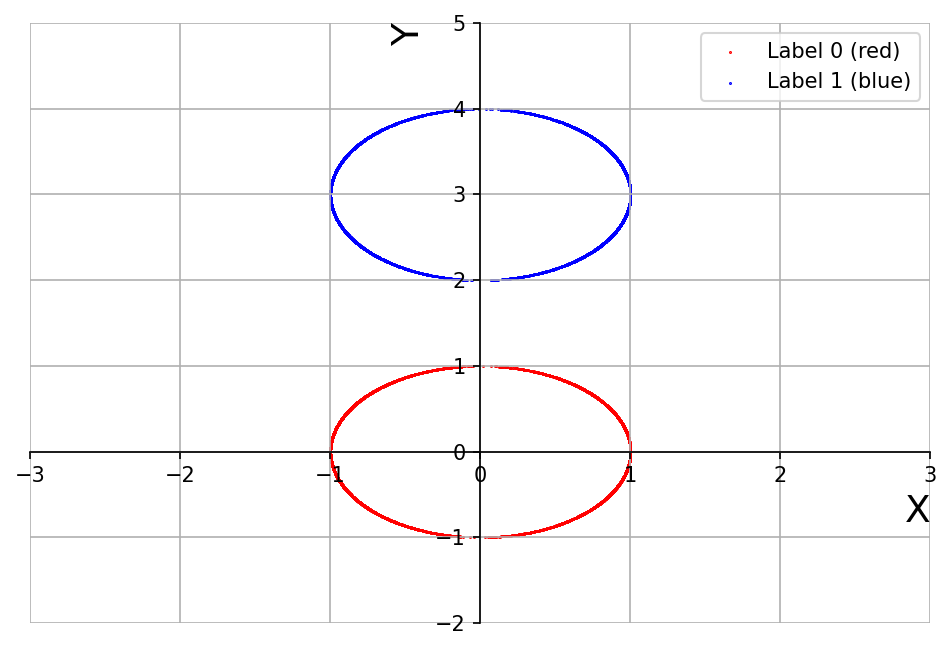

In [9]:
plot_dataset(df, [-3,3], [-2,5])

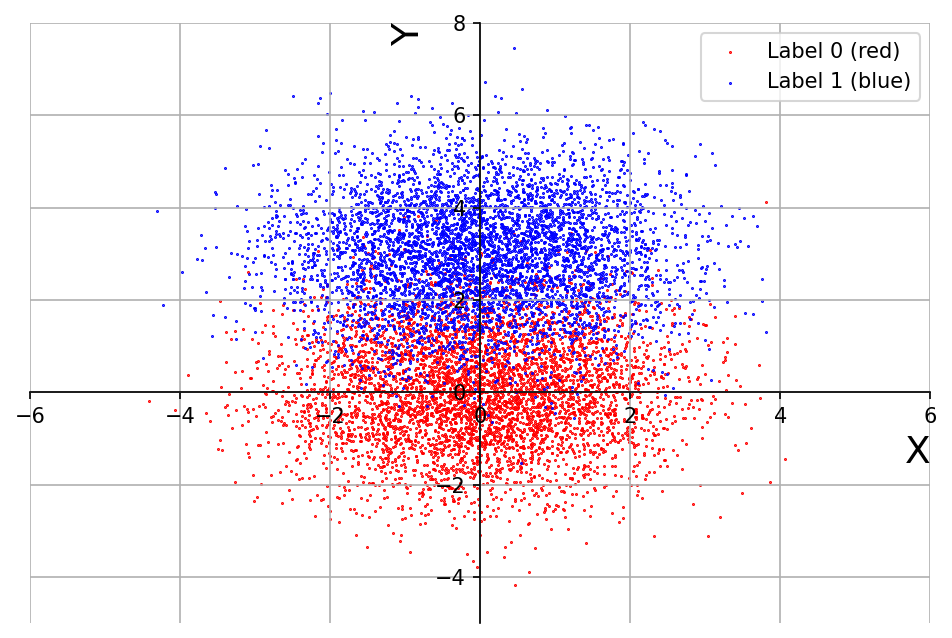

In [10]:
plot_dataset(df_noise, [-6,6], [-5,8])

# Q2 Part-3

In [27]:
def apply_preceptron_on_data(df_set: pd.DataFrame, partition_size, with_bias=True):
    x_train, y_train, x_test, y_test = split_data_into_train_test(df_set, with_bias, partition_size)

    perceptron_model = Perceptron()
    perceptron_model.fit(x_train, y_train)

    y_pred = perceptron_model.predict(x_test)

    accuracy = perceptron_model.accuracy(x_test, y_test)
    # print(perceptron_model.weights)

    print(f'Accuracy in Prediction of Perceptron Leraning Algorithm:', accuracy)
    plot_dataset(df_set, [-3,3], [-2,5], plot_decision_boundary=True, 
                model_weights=perceptron_model.weights, with_bias=with_bias)

Accuracy in Prediction of Perceptron Leraning Algorithm: 1.0


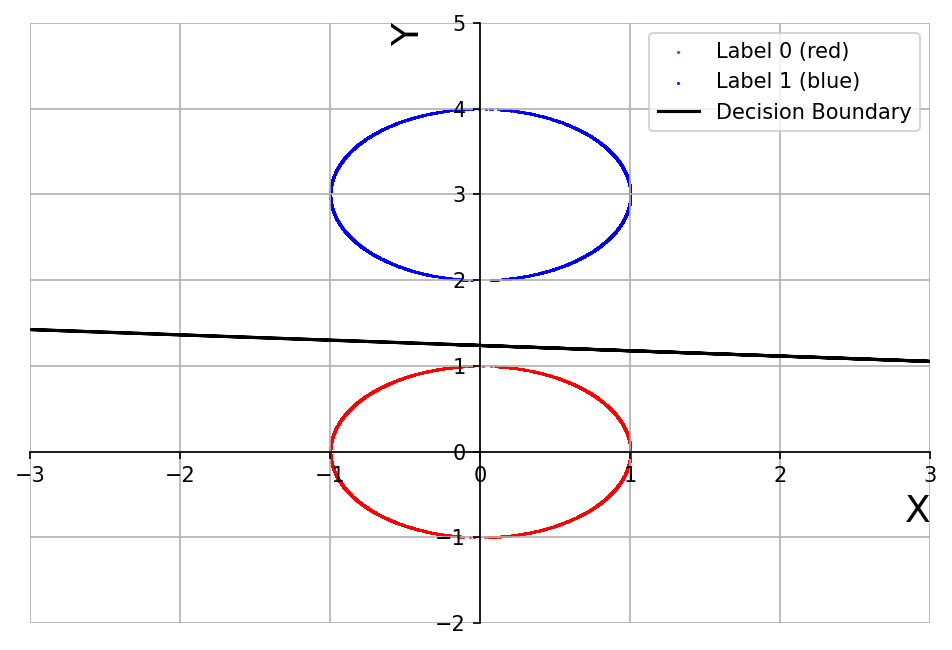

In [17]:
apply_preceptron_on_data(df, partition_size=[80, 20])

Explain why PTA is not applicable in noisy data

Try PTA in greater dimesnion (with more features, by including centers for circle and radius) and we see it will give a decision boundary in greater dimension,
which is not possible in 2-D.
Also the accuracy is 100% with noisy data, in greater dimension.

Accuracy in Prediction of Perceptron Leraning Algorithm: 0.8515


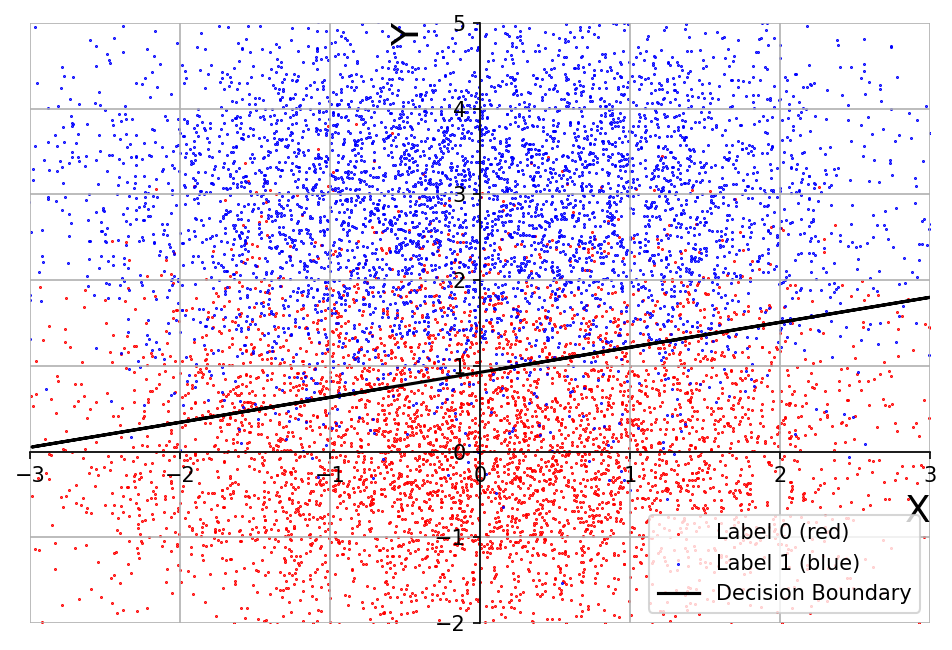

In [18]:
apply_preceptron_on_data(df_noise, partition_size=[80, 20])

# Q2 Part(4)

Accuracy in Prediction of Perceptron Leraning Algorithm: 0.753


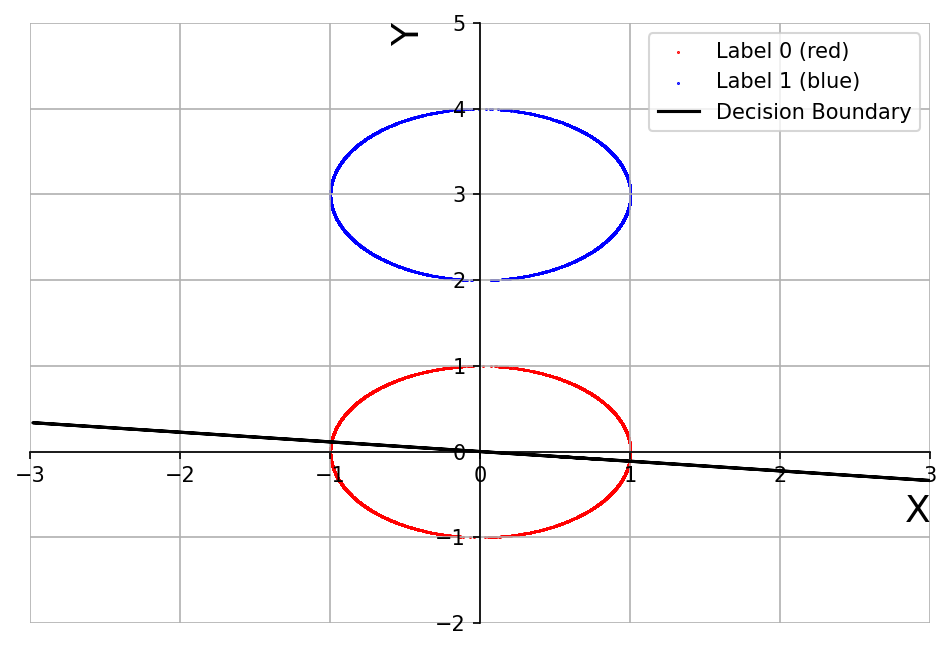

In [28]:
apply_preceptron_on_data(df, with_bias=False, partition_size=[80, 20])